**Exercise 2.4:** There are actually two kinds of ER graphs. The one we generated in this chapter, $G(n,p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes. 

An alternative definition, denoted $G(n,m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$. Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition. Here are a few suggestions for how to proceed:

1. Write a function called ```m_pairs``` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges. A simple way to do that is to generate a list of all possible edges and use ```random.sample```.

2. Write a function called ```make_m_graph``` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of ```prob_connected``` that uses a ```make_m_graph``` instead of ````make_random_graph```.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def all_pairs(nodes):
  for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
      if i < j:
        yield u, v

In [3]:
def m_pairs(nodes,m): #as instructed
  pairs = list(all_pairs(nodes))
  return random.sample(pairs,m)

In [4]:
def make_m_graph(n,m): #as instructed
  G = nx.Graph()
  nodes = range(n)
  G.add_nodes_from(nodes)
  G.add_edges_from(m_pairs(nodes,m))
  return G

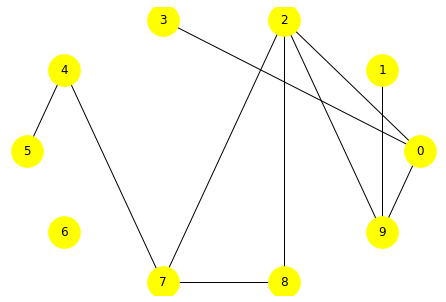

In [5]:
nx.draw_circular(make_m_graph(10,10),
                 node_color='yellow',
                 node_size=1000,
                 with_labels=True)

In [6]:
def reachable_nodes(G, start): #from the book
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [7]:
def is_connected(G): #from the book
  start = next(iter(G))
  reachable = reachable_nodes(G,start)
  return len(reachable) == len(G)

In [8]:
def prob_connected_m(n, m, iters = 100): #from the book albeit modified as instructed
  tf = [is_connected(make_m_graph(n,m))
        for i in range(iters)]
  return np.mean(tf)

In [9]:
prob_connected_m(100,250, iters = 100)

0.53

In [10]:
def underride(d, **options):
    for key, val in options.items():
        d.setdefault(key, val)

    return d

def legend(**options):
    underride(options, loc="best", frameon=False)

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, **options)

def decorate(**options):
    loc = options.pop("loc", "best")
    if options.pop("legend", True):
        legend(loc=loc)

    plt.gca().set(**options)
    plt.tight_layout()

options = dict(ls='', marker='.')

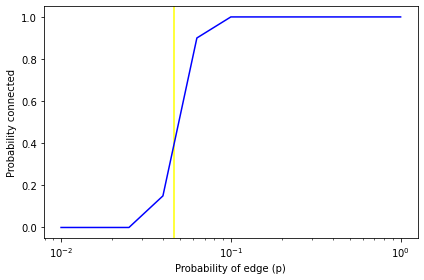

In [11]:
n = 100
prob_connected_m(n, 250, iters=100)
pstar = np.log(n)/n  #I was guided from the repository notebook for chapter 2 from this line onwards.
ps = np.logspace(-2,0,11) #The values I chose here are such that I could get a somewhat smooth graph.
ms = [int(p*n*(n-1)/2) for p in ps] #Unlike the example from the book, we are interested in m, instead of p so we want to write m = m(p) by simply multiplying m = n*(n-1)/2 to p.
ys = [prob_connected_m(n, m, iters=100) for m in ms]

plt.axvline(pstar, color='yellow')
plt.plot(ps, ys, color = 'blue')
decorate(xlabel='Probability of edge (p)', ylabel='Probability connected',
         xscale='log')


It has the same shape from the previous experiment but the critical value is different.